# Visualizing Honey Production 🍯 🐝

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r"C:\Users\MINE\OneDrive\Desktop\ArewaDS-Machine-Learning\data\honey.csv")
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [3]:
df.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


In [4]:
df.shape

(626, 8)

In [5]:
df.isnull().sum()

state          0
numcol         0
yieldpercol    0
totalprod      0
stocks         0
priceperlb     0
prodvalue      0
year           0
dtype: int64

### Total Production of Honey by State Over The years

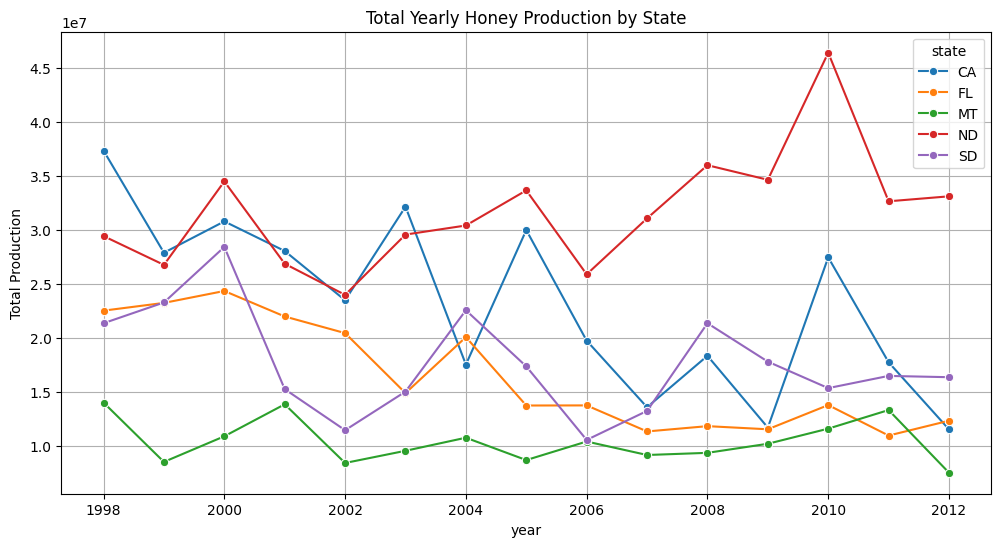

In [7]:
# Group by state and sum total production over all years
top_states=df.groupby('state')['totalprod'].sum().nlargest(5).index


#filter the  state
top_df=df[df['state'].isin(top_states)]

#Group by state and year
top_states_yearly=top_df.groupby(['state', 'year'])['totalprod'].sum().reset_index()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=top_df, x='year', y='totalprod',hue='state', marker='o')
plt.title('Total Yearly Honey Production by State')
plt.xlabel('year')
plt.ylabel('Total Production')
plt.grid(True)
plt.legend(title='state')
plt.show()

Difference state showed varying trends in honey production. the line plot by state highligts that state like North Dakota, California,Florinda consistently produced large amount of honey, while other saw flauctuation.

### Trend of Total Honey Production Over Time

<Figure size 1200x800 with 0 Axes>

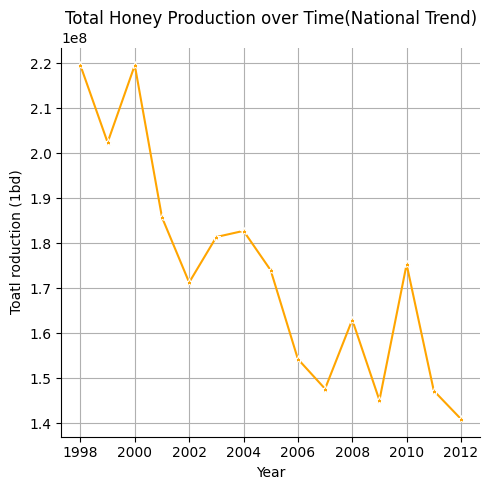

In [ ]:
yearly_prod=df.groupby('year')['totalprod'].sum().reset_index()

plt.figure(figsize=(12,8))
sns.relplot(data=yearly_prod, x='year', y='totalprod', marker='*', kind='line', color='orange')
plt.title('Total Honey Production over Time(National Trend)')
plt.ylabel('Toatl Production (1bd)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

 The line plot of total honey production shows general downward trend in honey production across the U.S between 1998 and  2012

### Top 5 States by Average Production

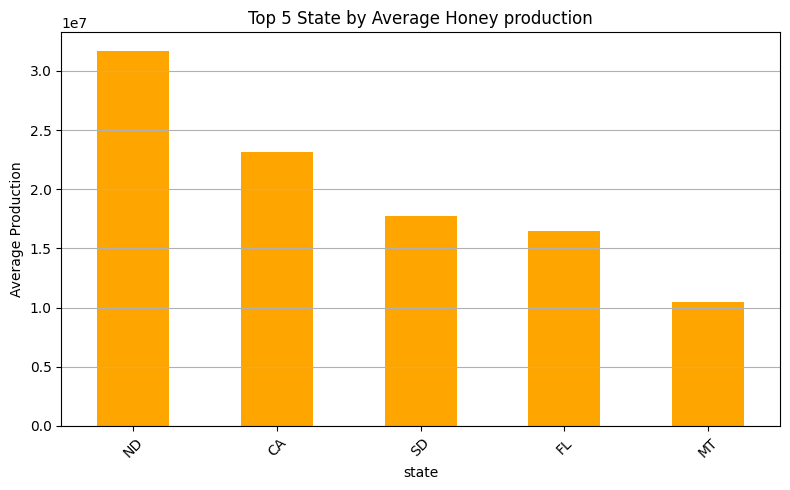

In [16]:
# Calculate avearge total production per state
avg_prod=df.groupby('state')['totalprod'].mean().sort_values(ascending=False).head(5)

#plot
avg_prod.plot(kind='bar', figsize=(8,5), color='orange')
plt.title('Top 5 State by Average Honey production')
plt.ylabel('Average Production')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

The bar plot reveals which state have highest avearge honey production over the entire period, highlighten state like California, North Dakota, and South Dakota as top performance

### Correlation Between Colonies and Yield

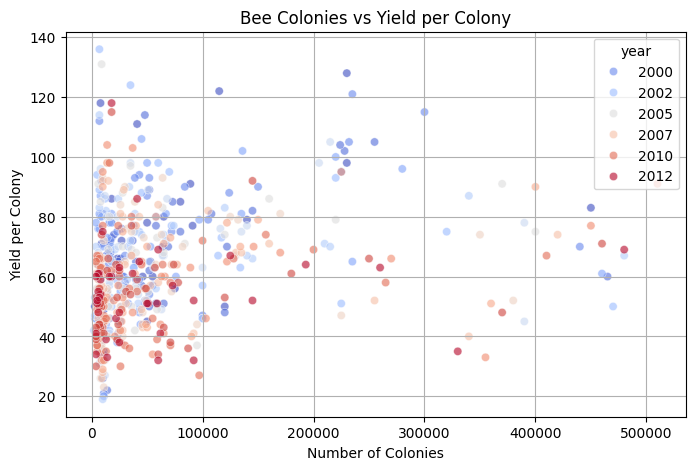

In [19]:

plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='numcol', y='yieldpercol',palette='coolwarm', hue='year',alpha=0.6)
plt.title('Bee Colonies vs Yield per Colony')
plt.xlabel('Number of Colonies')
plt.ylabel('Yield per Colony')
plt.grid(True)
plt.show()

The scatter plot of bee colonies vs yield per colony shows a relatively scattered distribution with no clear positive or negative correlation between the number of colonies and the yield per colony

### States Losing  Honey Productivity

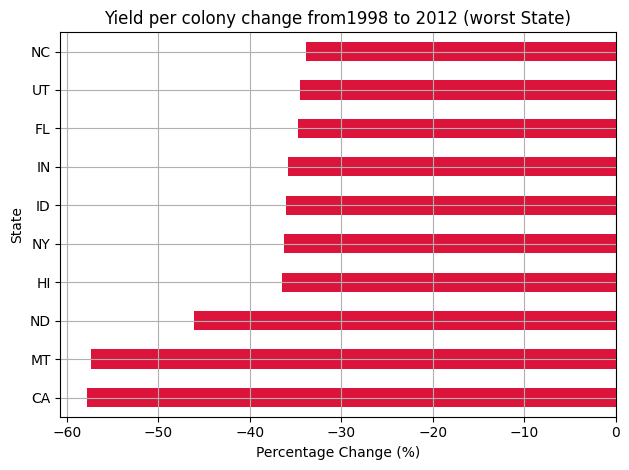

In [60]:
first_year=df['year'].min()
last_year=df['year'].max()

honey_first=df[df['year']==first_year].set_index('state')['yieldpercol']
honey_last=df[df['year']==last_year].set_index('state')['yieldpercol']

yield_change=((honey_last-honey_first)/ honey_first*100).dropna().sort_values()

yield_change.head(10).plot(kind='barh', color='crimson')
plt.title(f'Yield per colony change from{first_year} to {last_year} (worst State)')
plt.xlabel('Percentage Change (%)')
plt.ylabel('State')
plt.grid()
plt.tight_layout()
plt.show()

The bar plot showing yield decline highlights state like North Dakota , where honey  production has dropped significantly over the years

### National Regression Trend of Yield per Colony

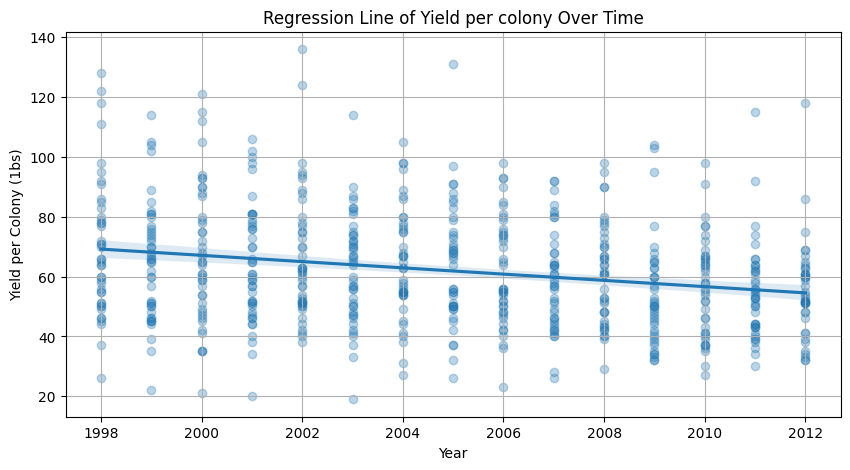

In [63]:
plt.figure(figsize=(10,5))
sns.regplot(data=df, x='year',y='yieldpercol',scatter_kws={'alpha':0.3})
plt.title('Regression Line of Yield per colony Over Time')
plt.xlabel('Year')
plt.ylabel('Yield per Colony (1bs)')
plt.grid()
plt.show()

The regression line shows a clear downward slope, indicating a long term decline in the yield er colony across U,S over the years